# Assignment 2 : Data Science with Python

This assignment is based on the Mice protein expressions data set sourced from UCI repository. In this project we aim to predict the class variable using the protein information features provided in this data set. The following hyperlink is the data source : (https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression).

Based upon the data information provided on the source of this data set it is found that the data consists of expression levels of 77 protein modifications that produced detectable signals in the nuclear fraction of cortex of mice. There are total 72 mice out of which 38 are control and 34 are trisomic (Down Syndrome). In the experiments, 15 measurements were registered of each protein per sample/mouse. Hence we have 570 measurements for control mice and 510 measurements for trisomic mice. The data set contains 1080 measurements per protein.

There are total 82 features in this data set including multivariate class feature which is our target feature. The class feature has 8 different target features. 

There are 77 numeric features, 4 categorical features and 1 Mouse_ID feature present in the dataset. 


The format of the assignment is as follow: 
- [Section 1 (Overview  and Preparation of the Data)](#1) Provides brief information about the data and prepare the data set for the exploration purpose.
- [Section 2 (Exploration of the Data)](#2) Provides detailed exploration of 10 features of the data and then explore 10 different pairs of features from the data set.
- [Section 3 (Feature selection)](#3) Provides basic feature selection techniques to filter most important features for the modeling purpose of the data.
- [Section 4 (Modeling of the Data)](#4) In this section we try to fit the data into 2 classification algorithms and try to compare their performance.
- [Section 5 (Model comparison)](#5) In this section we compare the performance obtained by the models. 

## Section 1 : Overview and preparation of the Data <a class="anchor" id="1"></a>

The imported data set contains 82 features, out of which 77 features are identified to be protein modidications observed while testing on different types of mice. There are however 3 main categorical(object) features in the data set. The categorical features are Genotype, behavior and treatment. The class variable is a multivariate feature depending on the vaules of these categorical features. 

Here is some insights on these categorical features: 
- The genotype of a mice can be control or trisomic.
- The behavior of a mice can be context shock i.e stimulated to learn or not stimulated.
- Some mice are treated with memantine drug while others are just saline. 



To predict the class of the mice based on the data, first, we have to read data into python environment. `pd.read_csv()` function is used for this purpose. Then we use the `head()` to have a quick look at the imported data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

df = pd.read_csv("Data_Cortex_Nuclear.csv")
df.head(10)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.

In [2]:
df.shape

(1080, 82)

It can be observed that all the protein expression features are numeric. The `MouseID` feature is observed to be a combination of ID of the mouse and the measurement number. Hence in the following chunk we separate these features.`str.split()` function in python is used to separate these features. 


In [3]:
df[['ID', 'Measurement']] = df.MouseID.str.split("_", expand = True)

In [4]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,ID,Measurement
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,309,1
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m,309,2
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m,309,3
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m,309,4
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807

In [5]:
Col = df.columns.tolist()
Col = Col[-2:]+ Col[:-2]
df = df[Col]
df = df.drop(columns = ['MouseID'])
df.head()

,ID,Measurement,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309,1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309,2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309,3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309,4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309,5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.16

Since we have now separated the mouse ID and measurement features, we check if there are any null values in the data set. 
The `isna()` function in python is used for the same.

In [6]:
df.isna().sum()

ID             0
Measurement    0
DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
              ..
CaNA_N         0
Genotype       0
Treatment      0
Behavior       0
class          0
Length: 83, dtype: int64

After observong the above values it can be concluded that the missing values are found in the protein information features that is the numeric features in the data set. The categorical features such as measurement, genotype, treatment and behavior do not contain any missing values. 

Since the data set represents protein information which was obtained after conducting an experiment it would not be a good practise to delete or ignore the missing values. Since we have found the missing values in the numerical features in the dataset we can impute those values with the mean values of the respective features. 

`fillna()` function in python can be used to fill the missing values with the mean or average values of the features. 


In the following chunck we check the missing values of each column and is there are any found then they are replaced by the mean values. An example of the same is displayed with H3AcK18_N feature. Similarly all other features can be checked. 


In [7]:
print("Number if missing values in feature H3AcK18_N before imputation are:")
print(df['H3AcK18_N'].isna().sum())
print ("********************************************************************")
Numeric_Col = []
for col in df.columns.tolist():
    if(df[col].dtype == 'float64'):
        Numeric_Col.append(col)

for col in Numeric_Col:
    df.fillna(df[col].mean(), inplace = True)
    
print("Number if missing values in feature H3AcK18_N after imputation are:")
print(df['H3AcK18_N'].isna().sum())

Number if missing values in feature H3AcK18_N before imputation are:
180
********************************************************************
Number if missing values in feature H3AcK18_N after imputation are:
0


## Section 2 : Data Exploration <a class="anchor" id="1"></a>


In this section, we try to explore some of the features in our data set to find out some interesting results from it. Then we will compare some pairs of feature to check the dependency of features on one another and other important feacts about the data set.


In our data set number of Numeric features are more than the categorical features, we will plot Histograms for some of the Protein Expression value features. For this purpose we will make a python function to plot a Histogram of the feature we provide to it with provided number of bins in it.

In [8]:
def histo(col, bins):
    fig = plt.figure(figsize = (12,10))
    df.hist(column = col)
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Frequency",fontsize=15)
    plt.show()

First We will plot Histograms for first 5 protein expression features namely `DYRK1A_N`, `ITSN1_N`, `BDNF_N`, `NR1_N`, `NR2A_N`. For that, we will save them into a list first and then call method `histo ()` on each of them.

<Figure size 864x720 with 0 Axes>

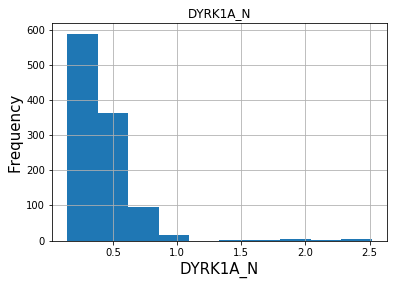

<Figure size 864x720 with 0 Axes>

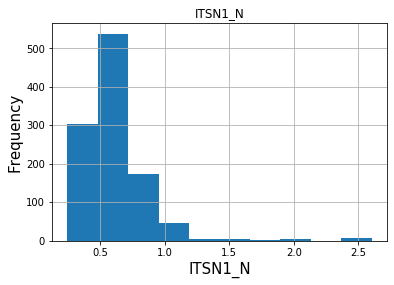

<Figure size 864x720 with 0 Axes>

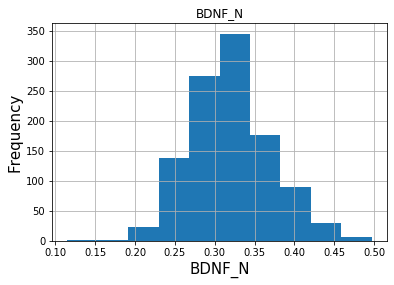

<Figure size 864x720 with 0 Axes>

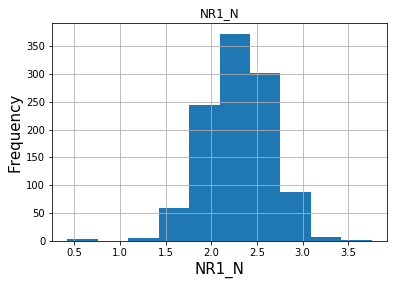

<Figure size 864x720 with 0 Axes>

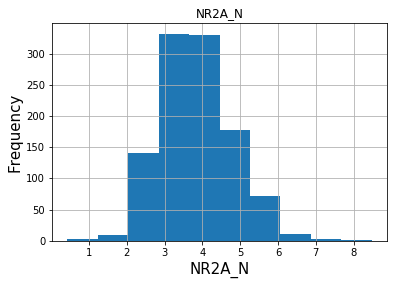

In [9]:
histo_Cols = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N']
for col in histo_Cols:
    histo(col, 20)

We can see from the above grpahs that, histograms for features like, `BDNF_N`, `NR1_N` and `NR2A_N` are almost normally distributed while some features like `DYRK1A_N` and `ITSN1_N` shows right skewed distribution of the values. We can aslo see that values for some of the features ranges between 0 and 1 but for others it may greater than 1.

To see the detailed distribution of values we can use Boxplots also. From boxplots we can see the quartiles, median and in some of the cases we can check the nature of outliers also.

We will try to find out the distribution of some of the features using `boxplot()`. for that purpose we will import `Seaborn` package to easily plot the boxeplots. In this exploration we will use 5 Numeric features having more number of missing values for our exploration. these features are namely `BAD_N`, `BCL2_N`,`H3AcK18_N`,`EGR1_N`,`H3MeK4_N`.

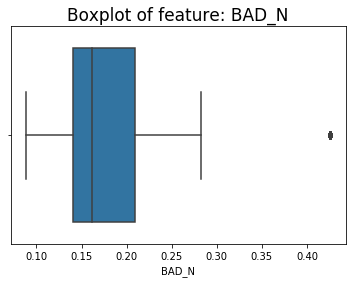

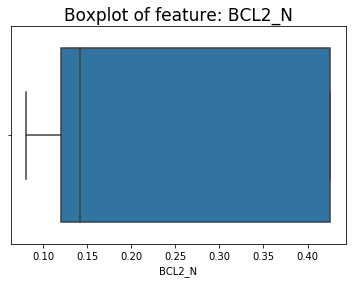

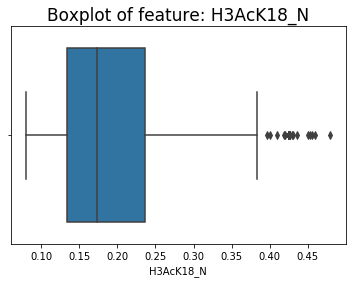

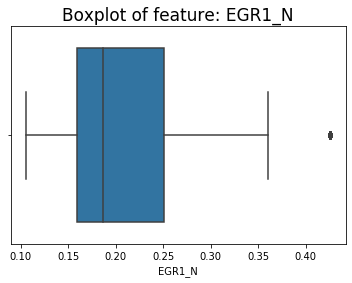

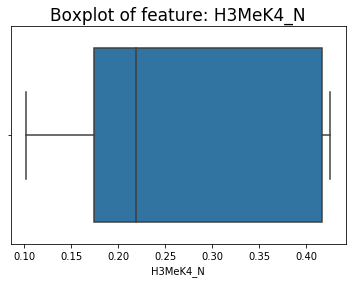

In [10]:
import seaborn as sns

Box_Cols = ['BAD_N', 'BCL2_N','H3AcK18_N','EGR1_N','H3MeK4_N']

for col in Box_Cols:
    sns.boxplot(df[col]).set_title(f"Boxplot of feature: {col}", fontsize = 17)
    plt.show()

From the above boxplots, we can see that, values distribution for features like `BCL2_N` and `H3MeK4_N` is highly right skewed. but that of the other features like `BAD_N`, `H3AcK18_N` and  `EGR1_N` are normally distributed. We can see the outliers in case of `H3AcK18_N` and `EGR1_N`. 

**Bivariate Data Exploration**

Bivariate analysis is the simultaneous analysis of 2 variables. The relationship between 2 variables can be explored as to whether there exists any association between two features or there exists any difference between these two selected features. 

Since we have 77 numerical features in this data set and 4 categorical features, we will explore these features forming a pair in below chunks. 


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1080 non-null   object 
 1   Measurement      1080 non-null   object 
 2   DYRK1A_N         1080 non-null   float64
 3   ITSN1_N          1080 non-null   float64
 4   BDNF_N           1080 non-null   float64
 5   NR1_N            1080 non-null   float64
 6   NR2A_N           1080 non-null   float64
 7   pAKT_N           1080 non-null   float64
 8   pBRAF_N          1080 non-null   float64
 9   pCAMKII_N        1080 non-null   float64
 10  pCREB_N          1080 non-null   float64
 11  pELK_N           1080 non-null   float64
 12  pERK_N           1080 non-null   float64
 13  pJNK_N           1080 non-null   float64
 14  PKCA_N           1080 non-null   float64
 15  pMEK_N           1080 non-null   float64
 16  pNR1_N           1080 non-null   float64
 17  pNR2A_N       

In [12]:
print("Behavior value counts are: ")
print(df['Behavior'].value_counts())
print("Genotype value counts are: ")
print(df['Genotype'].value_counts())
print("Treatment value counts are: ")
print(df['Treatment'].value_counts())


Behavior value counts are: 
S/C    555
C/S    525
Name: Behavior, dtype: int64
Genotype value counts are: 
Control    570
Ts65Dn     510
Name: Genotype, dtype: int64
Treatment value counts are: 
Memantine    570
Saline       510
Name: Treatment, dtype: int64


**1. Relationship between Genotype and Protien(DYRK1A_N)**

After exploring the columns Genotype and protien(DYRK1A_N) it is observed in the following scatter plot that most of the Genotypes have protien values in the range 0 to 0.5 but not above 1.0. 
It can be observed that although both the Genotypes follow similar trends control type has some values of protien DYRK1A_N above 1.5 range. 

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


Text(0.5, 1, 'Box plot of Genotype and Protien(DYRK1A_N)')

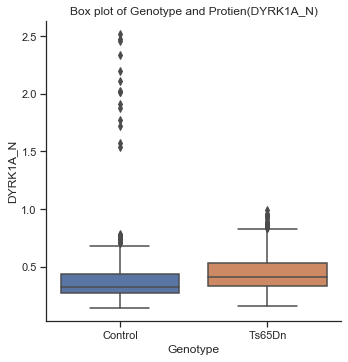

In [14]:
sns.catplot(x="Genotype",y="DYRK1A_N",data = df,kind = "box")
plt.title("Box plot of Genotype and Protien(DYRK1A_N)")

**Relationship between Treatment and Protien(pP70S6_N)**

`Plausible Hypothesis`: It can be observed that the mice affected with memantine have values in the range 0.1 to 0.7 where as the Saline mice have values in the range 0.1 to 0.8, but most of the values of the mice being saline are in the range 0.1 to 0.5 having median value around 0.4.

Text(0.5, 1, 'Box plot of Treatment and Protien(pP70S6_N)')

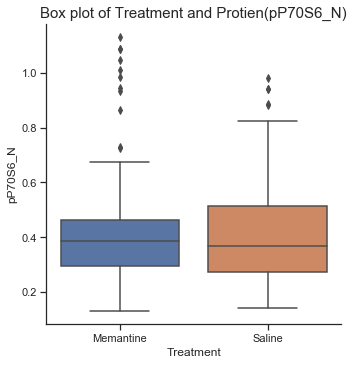

In [15]:
sns.catplot(x="Treatment",y="pP70S6_N",data = df,kind = "box")
plt.title("Box plot of Treatment and Protien(pP70S6_N)",fontsize = 15)

**Relationship between Behavior and protien(ADARB1_N)**

`Plausible Hypothesis`: It can be observed from the following Boxen plots that there is significant difference between the range of values of behavior with respect to the protein(ADARB1_N). Although the median values context shock and non context shock are almost similar the range of context shock lies from 1.0 to 1.50 where as the range of not context shock lies from 1.0 to 1.25. 

Text(0.5, 1, 'Box plot of Behavior and protien(ADARB1_N )')

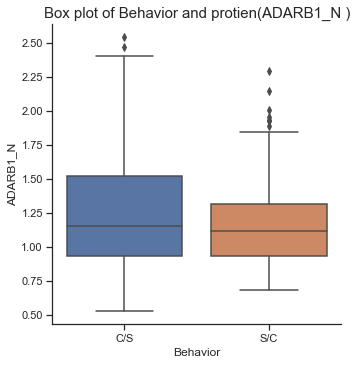

In [16]:
sns.catplot(x="Behavior", y="ADARB1_N", kind="box",
            data=df);
plt.title("Box plot of Behavior and protien(ADARB1_N )",fontsize = 15)

**Relationship between protien(pPKCG_N) and protien(CDK5_N)** 

`Plausible Hypothesis`: It can be observed from the following scatterplot that all the values of protein(pPKCG_N) lies below the 0.4 of protien(CDK5_N), however, one exception can be observed.

Text(0.5, 1.0, 'lmplot of protien(pPKCG_N) and protien(CDK5_N)')

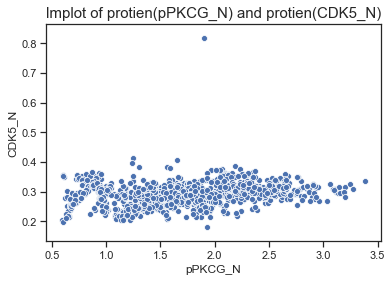

In [17]:
sns.scatterplot(x="pPKCG_N", y="CDK5_N", data=df)

plt.title("lmplot of protien(pPKCG_N) and protien(CDK5_N)",fontsize =15)

 

**Relationship between protien(CREB_N) and protien(CAMKII_N)** 

`Plausible Hypothesis`: It can be concluded from the below lmplot that the values of protein(CAMKII_N) increases with the value of protein(CREB_N)

Text(0.5, 1, 'Lmplot of protien(CAMKII_N) and protien(CREB_N)')

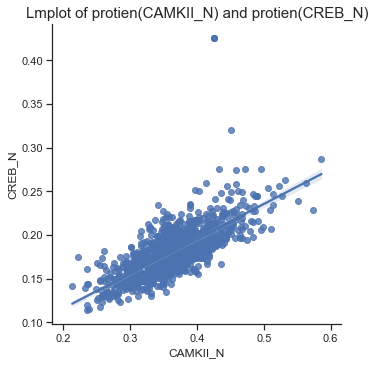

In [18]:
sns.lmplot(x='CAMKII_N', y='CREB_N', data=df)
plt.title("Lmplot of protien(CAMKII_N) and protien(CREB_N)",fontsize=15)


**Relationship between protien(GluR3_N) and protien(GluR4_N)**

`Plausible Hypothesis`: It can be observed from the following graph that there is a visible linear increase in the value of protien GluR3_N with the increase in the value of protein GluR4_N. However, the bandwidth of increase is narrow. 

Text(0.5, 1.0, 'Lmplot of protien(GluR3_N) and protien(GluR4_N)')

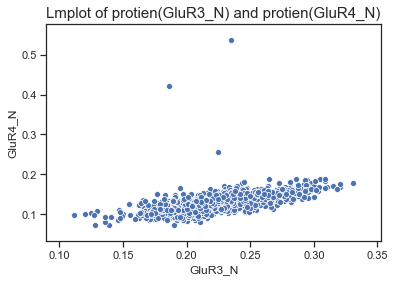

In [19]:
sns.scatterplot(x='GluR3_N', y='GluR4_N', data=df)
plt.title("Lmplot of protien(GluR3_N) and protien(GluR4_N)",fontsize=15)

**Relationship between treatment type and protein(RAPTOR_N)**

`Plausible Hypothesis`: It can be observed in the following graph  that both Memantine and Saline treatment of RAPTOR_N protein lies in almost similar range values. 

Text(0.5, 1, 'Box plot of Treatment and Protien(RAPTOR_N)')

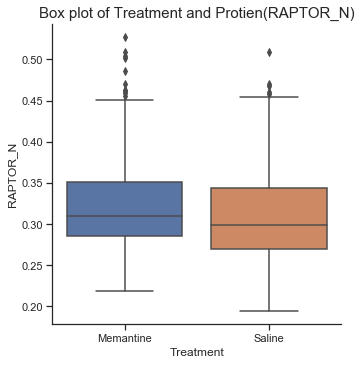

In [20]:
sns.catplot(x="Treatment",y="RAPTOR_N",data = df,kind = "box")
plt.title("Box plot of Treatment and Protien(RAPTOR_N)",fontsize = 15)

**Relationship between Genotype and Protien(Tau_N)**

`Plausible Hypothesis`: It can be observed in the below graph that the median values of both the Genotypes Control and trisonic lies slightly below and above 0.2 respectively, however, there are no triscot values above 0.5 Tau_N.

Text(0.5, 1, 'Box plot of Genotype and Protien(Tau_N)')

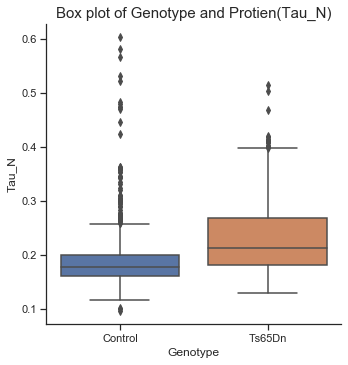

In [21]:
sns.catplot(x="Genotype",y="Tau_N",data = df,kind = "box")
plt.title("Box plot of Genotype and Protien(Tau_N)",fontsize = 15)

**Relationship between Behavior and protien(Ubiquitin_N)**

`Plausible Hypothesis`: It can be observed in the following box plot that there exists a vast difference in the range of values of context shock and non context shock of behavior with respect to the protein values of(Ubiquitin_N). 

Text(0.5, 1, 'Box plot of Behavior and Protien(Ubiquitin_N)')

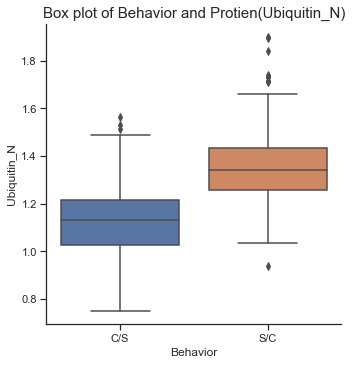

In [22]:
sns.catplot(x="Behavior",y="Ubiquitin_N",data = df,kind = "box")
plt.title("Box plot of Behavior and Protien(Ubiquitin_N)",fontsize = 15)

**Relationship between protein(pNR2A_N) and protein(pNR2B_N)**

`Plausible Hypothesis`: It can be observed in the below graph that the value of the protein pNR2A_N linearly increases with the value of pNR2B_N within range slightly below 1.0 to slightly below 2.5.

Text(0.5, 1, 'Lmplot of protien(pNR2A_N) and protien(pNR2B_N)')

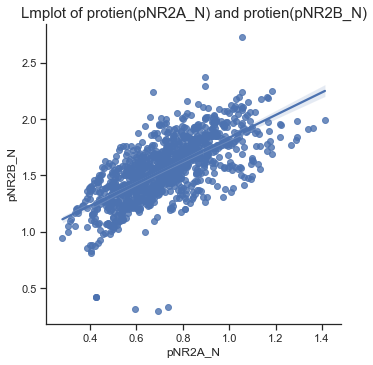

In [23]:
sns.lmplot(x='pNR2A_N', y='pNR2B_N', data=df)
plt.title("Lmplot of protien(pNR2A_N) and protien(pNR2B_N)",fontsize=15)

## Section 4 : Modelling of the Data <a class="anchor" id="4"></a>

Prior to modelling the data we need to separate the data and the target variables.
As mentioned in the description of the data the class variable is a representation of combination of 3 types of categorical data namely Genotype, Treatment and Behavior. 
However, we aim to define the target class variable based on the value of the protiens associated with each mice in the experiment. To acheive the same we have dropped the categorical features and stored all the protein information in the Data variable and target information in the target variable.

In [24]:
Target = df['class']
Data = df.drop(columns = ['ID','Measurement','Genotype','Treatment','Behavior','class'])

In [25]:
Data.head(2)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.45391,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.29470,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.42581,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.43094,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.29406,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.42581,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610


**Scaling of Data** 

Once we have seprated the data and the target variables, we then aim to scale the data prior to modelling. 
In the following chunk we perform `Min-Max Scaling()` of all the descriptive features.
It is convienient to choose Min-Max Scaling() for this data as the data set contains numerical data and the Min-Max scaler finds the minimum and maximum value of every feature and maps the data in the range 0 to 1.
The scaled data is stored in a separate data frame `scaledData` .

In [26]:
from sklearn import preprocessing

scaledData = Data.copy()
Data_Scaler = preprocessing.MinMaxScaler()
Data_Scaler.fit(Data)
data = Data_Scaler.fit_transform(Data)


In [27]:
pd.DataFrame(data, columns=scaledData.columns).sample(5, random_state = 999)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
576,0.220853,0.279266,0.516401,0.559912,0.393331,0.302375,0.292713,0.249148,0.272997,0.218059,0.217930,0.401361,0.438162,0.521335,0.331776,0.112796,0.446643,0.395903,0.614651,0.431329,0.247613,0.267673,0.207284,0.199225,0.400342,0.527617,0.499141,0.382869,0.688391,0.162134,0.485526,0.518831,0.049725,0.327980,0.076792,0.463301,0.482034,0.171377,0.370146,0.203605,0.209936,0.213533,0.239460,0.212554,0.367047,0.354342,0.378983,0.155095,0.295023,0.161173,0.072933,0.303963,0.604478,0.369513,0.374791,0.537275,0.174476,0.146507,0.465442,0.083378,0.257448,0.205131,0.247959,0.899939,0.111512,0.176985,0.507167,0.198253,0.079483,1.000000,0.369513,1.000000,0.223442,0.085713,0.001865,0.106160,0.794049
922,0.137157,0.243505,0.592661,0.603882,0.427279,0.307390,0.279387,0.268513,0.296320,0.168898,0.127760,0.637238,0.495868,0.499523,0.364320,0.343451,0.567908,0.659798,0.616446,0.576477,0.108411,0.328864,0.137008,0.410579,0.639259,0.552900,0.513642,0.537044,0.780288,0.168912,0.636148,0.612540,0.085245,0.452028,0.142057,0.540147,0.553654,0.274663,0.390406,0.402357,0.217133,0.342372,0.113434,0.554066,0.522688,0.448505,0.559854,0.286184,0.504609,0.606656,0.037311,0.300312,0.673456,0.463371,0.526770,0.261227,0.213018,0.258263,0.373721,0.099470,0.351716,0.316009,0.377103,0.633158,0.339177,0.443622,0.533740,0.230150,0.143172,0.056781,0.463371,0.082422,0.590724,0.058446,0.072765,0.154946,0.849810
855,0.160960,0.264502,0.621427,0.680621,0.452956,0.369593,0.307434,0.594575,0.533113,0.183917,0.179598,0.725618,0.896360,0.627363,0.502913,0.733915,0.651885,0.726336,0.700892,0.512906,0.120008,0.357879,0.208512,0.483431,0.573133,0.498060,0.512242,0.519181,0.834444,0.170659,0.694851,0.655102,0.082407,0.475318,0.160925,0.696853,0.618043,0.270876,0.421780,0.468367,0.230463,0.495140,0.189506,0.712794,0.816493,0.729595,0.789999,0.242173,0.843508,0.239385,0.190987,0.340419,0.774308,0.619655,0.660591,0.860972,0.345396,0.335627,0.546198,0.168652,0.414088,0.527157,0.723089,0.792641,0.256613,0.469514,0.452359,0.473018,0.182606,0.100279,0.619655,0.072011,0.569424,0.246733,0.146201,0.211657,0.785946
735,0.078088,0.136691,0.628636,0.693097,0.536842,0.399589,0.394761,0.419106,0.379226,0.236105,0.052749,0.705651,0.604720,0.698694,0.726542,0.572310,0.689943,0.423330,0.627980,0.647731,0.055376,0.516711,0.212910,0.410140,0.420224,0.444598,0.583397,0.549250,0.695474,0.211866,0.695178,0.717841,0.509144,0.735909,0.446884,0.834285,0.968971,0.671210,0.735023,0.584312,0.770750,0.810895,0.517029,0.399847,0.425025,0.362063,0.313967,0.130156,0.111602,0.401398,0.510836,0.443883,0.872635,0.600654,0.351007,0.531551,0.488239,0.438209,0.497106,0.179113,0.216454,0.136968,0.300226,0.474011,0.357068,0.512942,0.141144,0.300974,1.000000,1.000000,0.600654,0.158503,0.284417,0.865142,1.000000,0.672717,0.056513
305,0.167369,0.227008,0.783725,0.674276,0.653625,0.462922,0.372218,0.622479,0.457669,0.255713,0.203109,0.763377,0.824365,0.692100,0.537546,0.748310,0.647863,0.826465,0.844677,0.635549,0.168379,0.477620,0.305447,0.492608,0.590196,0.559725,0.626579,0.639917,0.807652,0.225830,0.567449,0.696496,0.113307,0.749852,0.310242,0.743919,0.728925,0.615439,0.590085,0.620705,0.644638,0.628940,0.352358,0.294078,0.373113,0.435353,0.499579,0.177442,0.303151,0.792611,0.178707,0.337227,0.692674,0.544265,0.380600,0.387954,0.139450,0.255954,0.318940,0.106469,0.219350,0.450782,0.336677,0.406793,0.215226,0.283359,0.197895,0.392483,1.00000

**Feature Selection and Ranking** 

Most important features are selected by using `Random Forest Feature Importance(RFI)` in the full data set. Random Forests are amongst the most popular machine learning methods known for thier relatively good accuracy, robustness and ease of use. This is for the quick ranking of the most relevant 10 features to gain some insights of the data.

RFI is later used in the hyper parameter tuning phase where it is included in the pipeline process and the top 10, 20 and all 77 features will be considered. 
`np.argsort() ` function is used to list the features in the descending order of their RFI scores.

In [28]:
from sklearn.ensemble import RandomForestClassifier
num_features = 10

model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, Target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = scaledData.columns[fs_indices_rfi].values
best_features_rfi

array(['SOD1_N', 'pERK_N', 'pPKCG_N', 'APP_N', 'CaNA_N', 'BRAF_N',
       'pCAMKII_N', 'DYRK1A_N', 'Ubiquitin_N', 'ARC_N'], dtype=object)

In [29]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.05723961, 0.03717734, 0.03680284, 0.02853487, 0.02833905,
       0.02661428, 0.02621622, 0.02559552, 0.02471689, 0.0243713 ])

Since we have obtained the most important features from the RFI feature selection technique, let us have a look at thier respective importance score.

In [30]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.05723961, 0.03717734, 0.03680284, 0.02853487, 0.02833905,
       0.02661428, 0.02621622, 0.02559552, 0.02471689, 0.0243713 ])

In the following chunk we plot the data with their respective features for gain some insights. 

In [31]:
%config InlineBackend.figure_format = 'retina'

import altair as alt
alt.renderers.enable('html') # required in Jupyter notebooks

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [32]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'grey')

alt.Chart(...)

From the above graph the top 10 features are plotted against thier importance scores.
Since we now have the most important features ranked, we can use this information while fine tuning our models. 

### Classification Models

- Classification is a technique extensively used to identify set of categories a new observation belongs.
- Two classification models are implemented below `K-Nearest-Neighbor` and `Decision Tree model`. 
- To classify the data set, it is divided into training and testing data
- To achieve higher accuracy a test train split having more data in the training is performed. A 70-30 split is performed on the data with 70% training data and 30% testing data. 
- The classification models KNN and Decision Trees will be trained on the extracted 70% training data, thier individual scores will be compared.
- Once the models are trained on the training data their performance on the test data will be monitored and conclusions can be formulated. 

**Train Test Spilt of Data**

The splitting of data is performed using sklearn library. The divided data is stored as training data, Target data, Testing data and Target testing in the respective n-dimensional arrays. 
Their shapes are monitored to verify the split.

In [33]:
from sklearn.model_selection import train_test_split

Data_sample_train, Data_sample_test,target_sample_train, target_sample_test = train_test_split(data, Target, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = Target)

print(Data_sample_train.shape)
print(Data_sample_test.shape)

(756, 77)
(324, 77)


**Cross Validation** 

`K-Fold cross validation` strategy is impleted with 5-folds to reduce over-fitting. The Random state 999 is used to retain the state which is passed as a method in the pipeline to obtain the model score after tuning. 

In [34]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=5,random_state=999)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


The following function `RFIFeatureSelector()` class is declared below with n_estimators = 100. 
This class will be passed as a step in the pipeline process. 


In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100,random_state=999)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

## Classification Model 1 : K-Nearest Neighbor 

Below, KNN model is implemented using the Pipeline. 
Pipeline feature of the sklearn enables us to chain multiple estimators i.e RFI for feature selection and KNN for model prediction, into one. This is useful particularly in this case as we follow the sequence in which we intially extract most important features and then test the model on those extracted featues. 

`pipe_KNN` is used to create a pipelining method in the sequence in which RFI feature selector will first return the selected top features from the RFIFeatureSelector() and then implement KNN classifier on those selected features

The parameters that are provided in the `params_pipe_KNN` are as follows: 
- The number of features in this case we have varied those features as top 10,20 and all 77 features.
- The number of neighbors n-neighbours which is used as a parameter for KNN.
- The value of p i.e Manhattan or Euclidean distance. 

`GridSearchCV` from the sklearn library is used below to implement a fit() and score() method. The following paramters are defined in the GridSearchCV:
- Estimator : Pipe_KNN declared above is passed as a step in the Grid Search CV.
- cv_method : The K-fold cross validation method
- refit : It is used to refit an esitmator using the best found paramters in the whole set of passed parameters.
- n_jobs : -2 value is use to ensure all CPU's but one is used. 
- scoring : Scoring method **accuracy** is used.
- verbose : Is used to know the statistics at run time during the searching phase.


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='accuracy',
                           verbose=1) 

In [37]:
import warnings
warnings.filterwarnings("ignore")
gs_pipe_KNN = gs_pipe_KNN.fit(Data_sample_train, target_sample_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:   35.7s finished


In [38]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 1, 'knn__p': 1, 'rfi_fs__n_features_': 77}

In [39]:
gs_pipe_KNN.best_score_

0.9907284768211921

In [40]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [41]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head(5)

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
2,0.990728,0.006754,1.000000,0.980132,1.0,1.0,77.0
5,0.990728,0.008983,1.000000,0.980132,1.0,2.0,77.0
1,0.989404,0.008983,1.000000,0.980132,1.0,1.0,20.0
4,0.985448,0.004961,0.993377,0.980132,1.0,2.0,20.0
11,0.962940,0.011586,0.980263,0.947020,5.0,2.0,77.0


In [42]:
import altair as alt
results_KNN_77_Features = results_KNN[results_KNN['rfi_fs__n_features_'] == 77.0]

alt.Chart(results_KNN_77_Features, 
          title='KNN Performance Comparison with 77 features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='Values of Distance Metric P')
)

alt.Chart(...)

The highest performance of KNN on the training data is noted to be **99.07%** accurate. The best parameters found are :
> **No of neighbors : 1** | 
**P : 1** | 
**No of Features : 77**

## Classification Model 2 : Decision Tree Model (DT)


Below, Decision Tree model is implemented using the Pipeline. 

`pipe_DT` is used to create a pipelining method in the sequence in which RFI feature selector will first return the selected top features from the RFIFeatureSelector() and then implement DT classifier on those selected features

The parameters that are provided in the `params_pipe_DT` are as follows: 
- The number of features in this case we have varied those features as top 10,20 and all 77 features.
- The maximum depth of the decision tree algorithm.
- Decision tree split criterion.
- Minimum samples split used for splitting.

`GridSearchCV` from the sklearn library is used below to implement a fit() and score() method. The following paramters are defined in the GridSearchCV:
- Estimator : Pipe_KNN declared above is passed as a step in the Grid Search CV.
- cv_method : The K-fold cross validation method
- refit : It is used to refit an esitmator using the best found paramters in the whole set of passed parameters.
- n_jobs : -2 value is use to ensure all CPU's but one is used. 
- scoring : Scoring method **accuracy** is used.
- verbose : Is used to know the statistics at run time during the searching phase.


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline


pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(random_state=999))])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__max_depth': [6,8,10],
                  'dt__criterion': ['gini', 'entropy'],
                  'dt__min_samples_split': [2, 5, 10]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='accuracy',
                          verbose=1) 

gs_pipe_DT.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-2)]: Done 270 out of 270 | elapsed:   58.1s finished


In [44]:
gs_pipe_DT.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 8,
 'dt__min_samples_split': 2,
 'rfi_fs__n_features_': 20}

In [45]:
gs_pipe_DT.best_score_

0.8545050540257929

In [46]:
results_DT = get_search_results(gs_pipe_DT).round(3)
results_DT.head(5)

,mean_score,std_score,max_score,min_score,dt__criterion,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
37,0.854505,0.0150189,0.880795,0.834437,entropy,8,2,20
49,0.853181,0.0152681,0.880795,0.834437,entropy,10,5,20
46,0.850558,0.0167696,0.880795,0.828947,entropy,10,2,20
40,0.847891,0.0186619,0.880795,0.827815,entropy,8,5,20
38,0.838663,0.0246859,0.880795,0.809211,entropy,8,2,77


In [47]:
results_DT_20_features = results_DT[results_DT['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_DT_20_features, 
          title='DT Performance Comparison with 20 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

The highest performance of Decision Tree on the training data is noted to be **86.24%** accurate. The best parameters found are :
> **Split Criterion : Entropy** | 
**Maximum Depth : 8** | 
**Minimum Sample Split : 5 |
No of Features : 20**

### Testing the models
During the hyperparameter tuning we have used 756 observations of the training data on the cross validation framework. The best hyperparameters were found on each of the classification models. 

Now that we have tuned trained models we can test these models on the testing data i.e the remaining 324 observations as this is the unseen data. We are going to do this using 5 fold cross validation using `cross_val_score method`from the `sklearn.model_selection` package.

**KNN model on test data**

In [48]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=5, random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=Data_sample_test,
                                 y=target_sample_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='accuracy')
cv_results_KNN.mean()

0.9320673076923077

> It can be observed that we have obtained **93.23%** accuracy of KNN on Test(unseen) data

**Decision Tree Model on Test Data**

In [49]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                X=Data_sample_test,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='accuracy')
cv_results_DT.mean()

0.7158653846153846

> It can be observed that we have obtained **73.41%** accuracy of Decision Tree on the Test(unseen) data.

**Confusion Matrices of Classification models**

In this step we plot the confusion matrices of obtained from both the models. Confusion matrix is a measure used to check the performance of the classification models. To obtain the same we store the predictions of each classifier on test data in separate lists plot them against the target test data. We are using `skelearn metrics` to draw confusion matrices.

In binary classification, the count of true negatives is at position [0,0] , false negatives is at [1,0] , true positives is at [1,1] and false positives is at [0,1] .

In [50]:
pred_KNN = gs_pipe_KNN.predict(Data_sample_test)
pred_DT = gs_pipe_DT.predict(Data_sample_test)

In [51]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor\n") 
print(metrics.confusion_matrix(target_sample_test, pred_KNN))
print("\nConfusion matrix for Decision Tree\n") 

print(metrics.confusion_matrix(target_sample_test, pred_DT))


Confusion matrix for K-Nearest Neighbor

[[45  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  3  0  0]
 [ 0  0 45  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  1  0  0  0  0 39]]

Confusion matrix for Decision Tree

[[34  3  0  0  6  2  0  0]
 [ 5 30  0  0  2  3  0  1]
 [ 0  0 42  0  0  0  3  0]
 [ 0  0  3 34  0  0  3  1]
 [ 4  5  0  0 31  0  0  0]
 [ 3  2  0  0  4 22  0  0]
 [ 0  0  3  1  0  0 37  0]
 [ 0  0  0  0  0  0  3 37]]


## Section 5 : Model Comparison <a class="anchor" id="5"></a>

In this section we compare the performance of both the classification models used above. We also conclude the best model that can be used on the data for prediction of unseen data. 

On the provided data set the numerical features were considered while predicting the target feature. The data was then divided into 70-30 split of training and testing data to evaluate the model. After using RFI feature selection to select top features ensuring the highest model performance, we also implement GridSearch which ensures exhaustive search of all the provided parameters of the models. Using these `sklearn` features we obtain tuned models with thier hyperparameters ready for the unseen(test) data. It was observed on the training data that KNN performed extremely well by giving an accuracy score **0.99** where as Decision Tree provided score of **0.8624**.

Using the models on the unseen data it was concluded that the KNN classification model provides the best cross validated accuracy score of **0.9323** on the useen data. Although Decision tree provides optimal value of **0.734** on the test data.

The KNN algorithm works by mapping the K nearest values of any observation, where as a Decision tree algorithm splits the data based on the criteria and the features of the proided data set. Hence it is observed that the KNN model is extensively used for numerical data as it performs better thus for this data set we can conclude that ***`KNN Classification`*** model can be used for data prediction. 
